In [28]:
import numpy as np 
import matplotlib.pyplot as plt


In [27]:
flip_params = 0
h0 = gamma0, omega0, n0, eta0, kappa0 = 100., 0., 1., 1., 9
h1 = gamma1, omega1, n1, eta1, kappa1 = gamma, 0., 1., 1., 9
if flip_params == 1:
    params = [h0, h1]
else:
    params = [h1,h0]
exp_path = str(params)+"/"

In [29]:
import pyarrow.parquet as pq

In [30]:
ff = np.random.randn(100, 100)

In [31]:
pq.write_table(ff

array([[-0.27661934,  1.34220509, -0.68150052, ..., -0.2084811 ,
         0.7465254 , -0.92855049],
       [-0.64126744, -0.77673638,  0.3558329 , ..., -1.17422262,
        -1.3038993 , -0.53803558],
       [-0.53599574, -0.34725238,  0.0563409 , ...,  0.07334954,
         1.6132667 , -0.21121307],
       ...,
       [ 0.53417372, -0.44393057,  0.03085555, ..., -1.01398808,
        -0.38126145,  1.14210883],
       [ 0.08838675, -0.63547776,  0.16709796, ..., -0.91941227,
         0.92853616,  1.06256101],
       [-1.94795147,  1.35386232, -0.1053647 , ...,  0.92552615,
        -1.45226113,  0.23162621]])

In [17]:
gamma0, omega0, n0, eta0, kappa0 = 1000, 0., 1, 1, 2*np.pi*360
gamma1, omega1, n1, eta1, kappa1 = 2000, 0., 1, 1, 2*np.pi*360
h0 = [gamma0, omega0, n0, eta0, kappa0]
h1 = [gamma1, omega1, n1, eta1, kappa1]

In [18]:
def give_drift(h0, h1):
    [gamma1, omega1, n1, eta1, kappa1] = h1
    [gamma0, omega0, n0, eta0, kappa0] = h0
    Su1 = n1 + 0.5 + (kappa1 / gamma1)
    Su0 = n0 + 0.5 + (kappa0 / gamma0)

    S1 = (np.sqrt(1 + (16.0*eta1*kappa1*Su1/gamma1)) - 1)*(gamma1/(8.0*eta1*kappa1))
    S0 = (np.sqrt(1 + (16.0*eta0*kappa0*Su0/gamma0)) - 1)*( gamma0/(8.0*eta0*kappa0))

    lam = gamma0 + (8*eta0*kappa0*S0)

    aa = (4*eta1*kappa1*(S1**2))/gamma1
    bb =(4*eta0*kappa0*S0**2)*(1+((16.0*eta1*kappa1*S1)/ (gamma1 + lam)) + (64.0*(eta1 * kappa1 * S1)**(2)/(gamma1 * (gamma1 + lam))))/ lam
    c =8 *(S0*S1*(eta0*kappa0 *eta1*kappa1)**(0.5)) * (gamma1+ (4.0*eta1*kappa1*S1) ) / ((gamma1 + lam)*gamma1)

    mu = 4*(eta1*kappa1*aa + (eta0*kappa0*bb) - 2*np.sqrt(eta1*kappa1*eta0*kappa0)*c)
    return mu
def drifts(h0,h1):
    return np.array([give_drift(h0,h1), give_drift(h1,h0)]    )

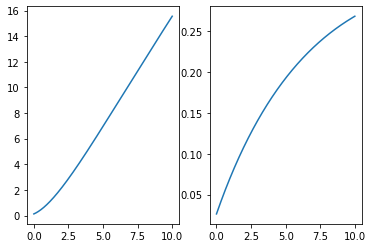

In [19]:
d = []
dg = 2000
kappa = 10
ens = np.linspace(1e-5, 10,1000)
for n in ens:

    gamma0, omega0, n0, eta0, kappa0 = 1000, 0., n, 1, kappa
    gamma1, omega1, n1, eta1, kappa1 = 1000+dg, 0., n, 1, kappa
    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]
    d.append(drifts(h0,h1))
d = np.array(d)
ax=plt.subplot(121)
ax.plot(ens,d[:,0])
ax=plt.subplot(122)
ax.plot(ens,np.abs(d[:,0]- d[:,1])/d[:,0]        )

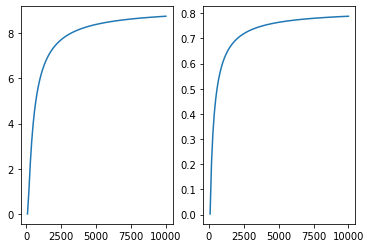

In [26]:
d = []
ens = np.linspace(101, 10000,100)
for gamma in ens:

    gamma0, omega0, n0, eta0, kappa0 = 100, 0., 1, 1, 9
    gamma1, omega1, n1, eta1, kappa1 = gamma, 0., 1, 1, 9
    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]
    d.append(drifts(h0,h1))
d = np.array(d)
ax=plt.subplot(121)
ax.plot(ens,d[:,0])
ax=plt.subplot(122)
ax.plot(ens,np.abs(d[:,0]- d[:,1])/d[:,0]        )

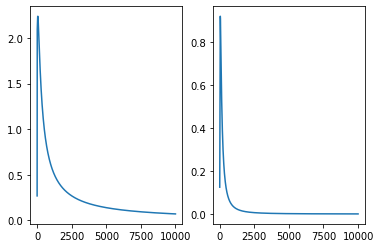

In [96]:
d = []
ens = np.linspace(1e-2, 10000,1000)
for gamma in ens:

    gamma0, omega0, n0, eta0, kappa0 = gamma, 0., 100, 1, kappa/100
    gamma1, omega1, n1, eta1, kappa1 = 4*gamma, 0., 100, 1, kappa/100
    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]
    d.append(drifts(h0,h1))
d = np.array(d)
ax=plt.subplot(121)
ax.plot(ens,d[:,0])
ax=plt.subplot(122)
ax.plot(ens,np.abs(d[:,0]- d[:,1])        )

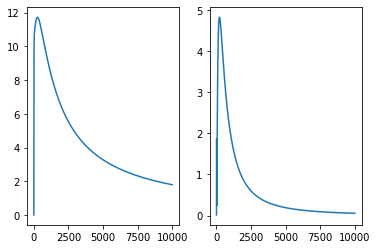

In [105]:
d = []
ens = np.linspace(1e-2, 10000,1000)
for gamma in ens:

    gamma0, omega0, n0, eta0, kappa0 = gamma, 0., 10, 1, kappa/2
    gamma1, omega1, n1, eta1, kappa1 = 4*gamma, 0., 10, 1, kappa/2
    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]
    d.append(drifts(h0,h1))
d = np.array(d)
ax=plt.subplot(121)
ax.plot(ens,d[:,0])
ax=plt.subplot(122)
ax.plot(ens,np.abs(d[:,0]- d[:,1])        )

In [106]:
np.argmax(np.abs(d[:,0] - d[:,1]))

21

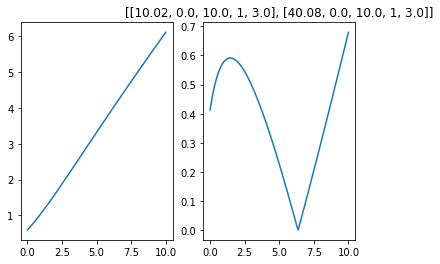

In [177]:
d = []
ens = np.linspace(1e-2, 10,100)
for n in ens:

    gamma0, omega0, n0, eta0, kappa0 = 10.02, 0., n, 1, 3.
    gamma1, omega1, n1, eta1, kappa1 = 4*10.02, 0., n, 1, 3.
    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]
    d.append(drifts(h0,h1))
d = np.array(d)
ax=plt.subplot(121)
ax.plot(ens,d[:,0])
ax=plt.subplot(122)
plt.title(str([h0,h1]))
ax.plot(ens,np.abs(d[:,0]- d[:,1])        )

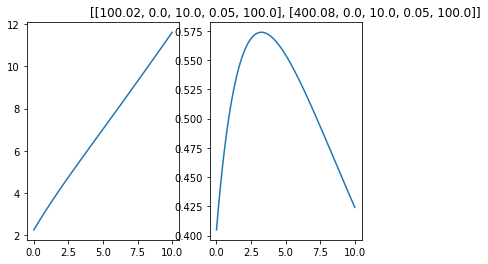

In [214]:
np.argmax(np.abs(d[:,0] - d[:,1]))

32

In [217]:
ens[27]

0.01

In [215]:
d[27]

array([5.43191164, 8.54859995])

In [216]:
d[0]

array([0.69766957, 1.04765097])

In [ ]:
gamma0 = 20.02
gamma1 = 4*gamma0
n1 = n0 = 2.7
eta1 = eta0 = 1.
kappa1 = kappa0 = 4.

CASO 1

In [185]:
gamma0 = 10.02
gamma1 = 4*gamma0
n1 = n0 = .05
kappa0 = kappa1 = 4. 
eta0 = eta1 = 1
h0 = [gamma0, omega0, n0, eta0, kappa0]
h1 = [gamma1, omega1, n1, eta1, kappa1]
drifts(h0,h1)

array([0.85800791, 1.58411343])

CASO 2

In [ ]:
gamma0 = 20.02
gamma1 = 4*gamma0
n1 = n0 = 2.7
eta1 = eta0 = 1.
kappa1 = kappa0 = 4.

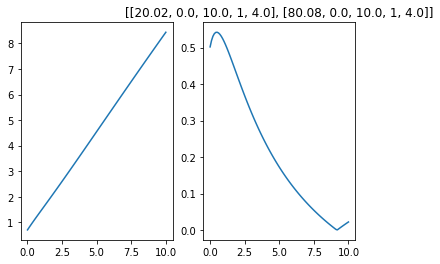

In [234]:
d = []
ens = np.linspace(1e-2, 10,100)
for n in ens:

    gamma0, omega0, n0, eta0, kappa0 = 20.02, 0., n, 1, 4.
    gamma1, omega1, n1, eta1, kappa1 = 4*20.02, 0., n, 1, 4.
    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]
    d.append(drifts(h0,h1))
d = np.array(d)
ax=plt.subplot(121)
ax.plot(ens,d[:,0])
ax=plt.subplot(122)
plt.title(str([h0,h1]))

ax.plot(ens,np.abs(d[:,0]- d[:,1])/d[:,0]        )

CASO 3

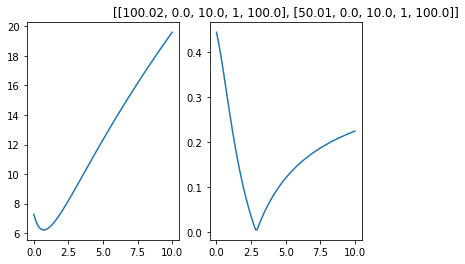

In [264]:
d = []
ens = np.linspace(1e-9, 10,100)
for n in ens:

    gamma0, omega0, n0, eta0, kappa0 = 100.02, 0., n, 1, 100.
    gamma1, omega1, n1, eta1, kappa1 = .5*100.02, 0., n, 1, 100.
    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]
    d.append(drifts(h0,h1))
d = np.array(d)
ax=plt.subplot(121)
ax.plot(ens,d[:,0])
ax=plt.subplot(122)
plt.title(str([h0,h1]))

ax.plot(ens,np.abs(d[:,0]- d[:,1])/d[:,0]        )

In [265]:
ii = np.argmax(np.abs(d[:,0] - d[:,1])/d[:,0])
d[ii]

array([7.27349412, 4.0409019 ])

In [263]:
ens[ii]

0.0001

In [ ]:
gamma0 = 100.02
gamma1 = 4*gamma0
n1 = n0 = 1e-4
eta1 = eta0 = 1
kappa1 = kappa0 = 100.

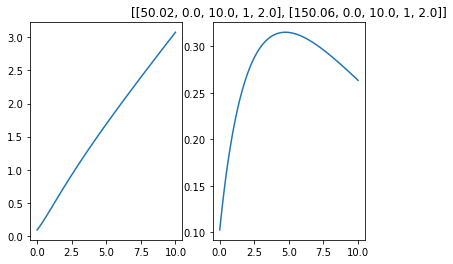

In [208]:
d = []
ens = np.linspace(1e-2, 10,100)
for n in ens:

    gamma0, omega0, n0, eta0, kappa0 = 50.02, 0., n, 1, 2.
    gamma1, omega1, n1, eta1, kappa1 = 3*50.02, 0., n, 1,2.
    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]
    d.append(drifts(h0,h1))
d = np.array(d)
ax=plt.subplot(121)
ax.plot(ens,d[:,0])
ax=plt.subplot(122)
plt.title(str([h0,h1]))

ax.plot(ens,np.abs(d[:,0]- d[:,1])/d[:,0]        )

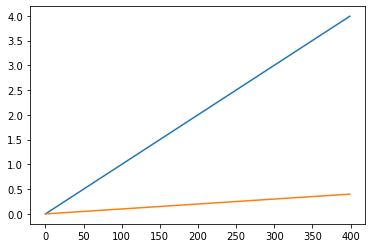

In [206]:
plt.plot(np.arange(0,4,.01))
plt.plot(np.arange(0,4,.01)*0.1)

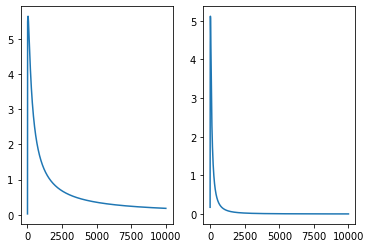

In [129]:
d = []
ens = np.linspace(1e-2, 10000,1000)
for gamma in ens:

    gamma0, omega0, n0, eta0, kappa0 = gamma, 0., 2, 1, kappa/2
    gamma1, omega1, n1, eta1, kappa1 = 10*gamma, 0., 2, 1, kappa/2
    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]
    d.append(drifts(h0,h1))
d = np.array(d)
ax=plt.subplot(121)
ax.plot(ens,d[:,0])
ax=plt.subplot(122)
ax.plot(ens,np.abs(d[:,0]- d[:,1])        )

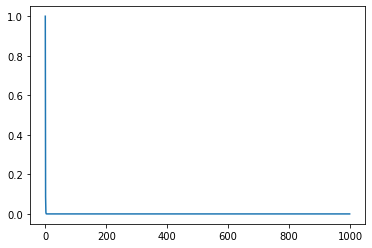

In [87]:
plt.plot([np.exp(-ens[61]*t) for t in np.linspace(0,4,1000)])

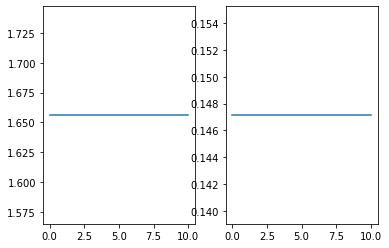

In [64]:
d = []
ens = np.linspace(1e-2, 10,1000)
for n in ens:

    gamma0, omega0, n0, eta0, kappa0 = 1000, 0., 0.01, 1, kappa
    gamma1, omega1, n1, eta1, kappa1 = 1100, 0., 0.01, 1, 2*np.pi*360
    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]
    d.append(drifts(h0,h1))
d = np.array(d)
ax=plt.subplot(121)
ax.plot(ens,d[:,0])
ax=plt.subplot(122)
ax.plot(ens,np.abs(d[:,0]- d[:,1])        )

In [26]:
dd = d[0]

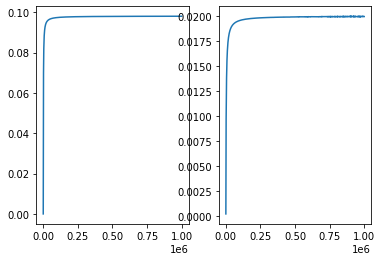

In [49]:
d = []
ens = np.linspace(1, 1e6,1000)
for k in ens:

    gamma0, omega0, n0, eta0, kappa0 = 1000, 0., 1, 1, k
    gamma1, omega1, n1, eta1, kappa1 = 1020, 0., 1, 1, k
    h0 = [gamma0, omega0, n0, eta0, kappa0]
    h1 = [gamma1, omega1, n1, eta1, kappa1]
    d.append(drifts(h0,h1))
d = np.array(d)
ax=plt.subplot(121)
ax.plot(ens,d[:,0])
ax=plt.subplot(122)
ax.plot(ens,np.abs(d[:,0]- d[:,1])/d[:,0]        )